In [1]:
import os
os.chdir('/Users/emilycanavan/Desktop/symposium')

In [2]:
import pandas as pd

In [3]:
data = pd.read_excel('pandas_simple.xlsx')

In [4]:
data.head()

,loan_type,loan_purpose,occupancy_type,loan_amount,action_taken,state_code,county_code,applicant_ethnicity_1,applicant_ethnicity_observed,applicant_race_1,applicant_race_observed,applicant_sex,applicant_sex_observed,applicant_age,income,denial_reason_1,interest_rate,debt_to_income_ratio,combined_loan_to_value_ratio,property_value
0,1,1,1,105000,1,TX,48355.0,2.0,2,3,2,2,1,25-34,97.0,10,4.25,30%-<36%,90.0,115000
1,1,32,1,75000,1,TX,48355.0,1.0,2,5,2,2,2,35-44,70.0,10,5.25,40,70.0,105000
2,1,32,1,145000,1,TX,48355.0,1.0,2,5,2,1,2,35-44,93.0,10,7.0,37,75.0,215000
3,1,32,1,125000,1,TX,48355.0,1.0,1,5,1,2,1,45-54,59.0,10,4.25,20%-<30%,80.0,155000
4,1,32,1,65000,1,TX,48355.0,1.0,2,5,2,1,1,45-54,30.0,10,6.5,30%-<36%,41.935,155000


In [5]:
data['state_code'].unique() #how many states are in the data?

array(['TX', 'MI', 'AZ', 'OH', nan, 'GA', 'CA', 'NY', 'ID', 'WY', 'NV',
       'MT', 'OR', 'NH', 'CO', 'UT', 'DC', 'OK', 'FL', 'WA', 'MS', 'CT',
       'IL', 'NC', 'KY', 'NJ', 'MD', 'MO', 'IA', 'PA', 'TN', 'AL', 'WV',
       'ME', 'VA', 'IN', 'DE', 'SC', 'AR', 'HI', 'MA', 'MN', 'WI', 'NM',
       'SD', 'KS', 'RI', 'LA', 'NE', 'ND', 'AK', 'VT'], dtype=object)

In [6]:
data.isnull().sum() #checking for nulls

loan_type                           0
loan_purpose                        0
occupancy_type                      0
loan_amount                         0
action_taken                        0
state_code                        340
county_code                       462
applicant_ethnicity_1               4
applicant_ethnicity_observed        0
applicant_race_1                    0
applicant_race_observed             0
applicant_sex                       0
applicant_sex_observed              0
applicant_age                       0
income                           8372
denial_reason_1                     0
interest_rate                   69201
debt_to_income_ratio            45400
combined_loan_to_value_ratio    41863
property_value                  37754
dtype: int64

In [7]:
del data['county_code'] #not neccessary

In [8]:
data.isnull().sum() #how many nulls?

loan_type                           0
loan_purpose                        0
occupancy_type                      0
loan_amount                         0
action_taken                        0
state_code                        340
applicant_ethnicity_1               4
applicant_ethnicity_observed        0
applicant_race_1                    0
applicant_race_observed             0
applicant_sex                       0
applicant_sex_observed              0
applicant_age                       0
income                           8372
denial_reason_1                     0
interest_rate                   69201
debt_to_income_ratio            45400
combined_loan_to_value_ratio    41863
property_value                  37754
dtype: int64

In [9]:
data = data.drop(data[data['denial_reason_1'] == 1111].index)
data = data.drop(data[data['denial_reason_1'] == 7].index)
data = data.drop(data[data['interest_rate'] == 'Exempt'].index)
data = data.drop(data[data['debt_to_income_ratio'] == 'Exempt'].index)
data = data.drop(data[data['combined_loan_to_value_ratio'] == 'Exempt'].index)
data = data.drop(data[data['applicant_age'] == '8888'].index)
#exclude exempt entries, denial reason 7 for incomplete app, and reason codes 1111 & 8888 (which mean NA)

In [10]:
data = data.drop(data[data['action_taken'] == 2].index)
data = data.drop(data[data['action_taken'] == 4].index)
data = data.drop(data[data['action_taken'] == 5].index)
data = data.drop(data[data['action_taken'] == 8].index)
data = data.drop(data[data['action_taken'] == 6].index)
#only including loan originated (1) and application denied (3) entries

In [11]:
data = data[data['state_code'].notna()]
data = data[data['income'].notna()] #delete nulls

In [12]:
data.shape

(247685, 19)

In [13]:
data.isnull().sum() #how many nulls?

loan_type                           0
loan_purpose                        0
occupancy_type                      0
loan_amount                         0
action_taken                        0
state_code                          0
applicant_ethnicity_1               2
applicant_ethnicity_observed        0
applicant_race_1                    0
applicant_race_observed             0
applicant_sex                       0
applicant_sex_observed              0
applicant_age                       0
income                              0
denial_reason_1                     0
interest_rate                   30557
debt_to_income_ratio              849
combined_loan_to_value_ratio       26
property_value                     33
dtype: int64

In [14]:
count = data['action_taken'].value_counts()[3]
print(count) #how many denials?

30556


In [15]:
data = data[data['applicant_ethnicity_1'].notna()]
data = data[data['debt_to_income_ratio'].notna()]
data = data[data['combined_loan_to_value_ratio'].notna()]
data = data[data['property_value'].notna()] #delete nulls

In [16]:
data.isnull().sum() 
#leaving interest rate null since only approved loans get rates

loan_type                           0
loan_purpose                        0
occupancy_type                      0
loan_amount                         0
action_taken                        0
state_code                          0
applicant_ethnicity_1               0
applicant_ethnicity_observed        0
applicant_race_1                    0
applicant_race_observed             0
applicant_sex                       0
applicant_sex_observed              0
applicant_age                       0
income                              0
denial_reason_1                     0
interest_rate                   30089
debt_to_income_ratio                0
combined_loan_to_value_ratio        0
property_value                      0
dtype: int64

In [17]:
data.shape #total entries

(246802, 19)

In [18]:
max(data['income']) #highest income

51776.0

In [19]:
q_low = data['income'].quantile(0.01)
q_hi  = data['income'].quantile(0.99)
data = data[(data['income'] < q_hi) & (data['income'] > q_low)] 
#exclude outliers in new dataset

In [20]:
max(data['income']) #new highest income

607.0

In [21]:
min(data['income']) #lowest income

25.0

In [22]:
#creating categorical columns for demographic data
e_dict = {1:'Hispanic or Latino',2:'Not Hispanic or Latino',
                       3:'Not Provided',4:'Not Provided'} 
data['ethnicity_categorical'] = data['applicant_ethnicity_1'].map(e_dict)
s_dict = {1:'Male',2:'Female',3:'Not Provided',4:'Not Applicable',6:'Both Selections Made'}
data['sex_categorical'] = data['applicant_sex'].map(s_dict)
r_dict = {1:'Native American or Alaska Native',2:'Asian',3:'Asian Indian',
                   22:'Chinese',23:'Filipino',24:'Japanese',25:'Korean',
                  26:'Vietnamese',27:'Other Asian',3:'Black or African American',
                  4:'Native Hawaiian or Other Pacific Islander',41:'Native Hawaiian',
                  42:'Guamanian or Chamorro',43:'Samoan',44:'Other Pacific Islander',
                  5:'White',6:'Not Provided'}
data['race_categorical'] = data['applicant_race_1'].map(r_dict)

In [23]:
#creating categorical columns for other variables
action_dictionary = {1:'Approved',3:'Denied'}
data['action_categorical'] = data['action_taken'].map(action_dictionary)
purpose_dictionary = {1:'Home Purchase',2:'Home Improvement',31:'Refinancing',
                      32:'Cash-Out Refinancing',4:'Other',5:'Not Applicable'}
data['purpose_categorical'] = data['loan_purpose'].map(purpose_dictionary)
type_dictionary = {1:'Conventional',2:'FHA Insured',3:'VA Guaranteed',
                   4:'USDA RHA or FSA Guaranteed'}
data['type_categorical'] = data['loan_type'].map(type_dictionary)
occupancy_dictionary = {1:'Principal Residence',2:'Second Residence',3:'Investment Property'}
data['occupancy_categorical'] = data['occupancy_type'].map(occupancy_dictionary)
denial_dictionary = {1:'Debt to Income Ratio',2:'Employment History',
                     3:'Credit History',4:'Collateral',5:'Insufficent Cash',
                    6:'Unverifiable Information',
                    8:'Mortgage Insurance Denied',9:'Other',10:'Not Applicable'}
data['denial_categorical'] = data['denial_reason_1'].map(denial_dictionary)

In [24]:
data.head()

,loan_type,loan_purpose,occupancy_type,loan_amount,action_taken,state_code,applicant_ethnicity_1,applicant_ethnicity_observed,applicant_race_1,applicant_race_observed,...,combined_loan_to_value_ratio,property_value,ethnicity_categorical,sex_categorical,race_categorical,action_categorical,purpose_categorical,type_categorical,occupancy_categorical,denial_categorical
0,1,1,1,105000,1,TX,2.0,2,3,2,...,90.0,115000,Not Hispanic or Latino,Female,Black or African American,Approved,Home Purchase,Conventional,Principal Residence,Not Applicable
1,1,32,1,75000,1,TX,1.0,2,5,2,...,70.0,105000,Hispanic or Latino,Female,White,Approved,Cash-Out Refinancing,Conventional,Principal Residence,Not Applicable
2,1,32,1,145000,1,TX,1.0,2,5,2,...,75.0,215000,Hispanic or Latino,Male,White,Approved,Cash-Out Refinancing,Conventional,Principal Residence,Not Applicable
3,1,32,1,125000,1,TX,1.0,1,5,1,...,80.0,155000,Hispanic or Latino,Female,White,Approved,Cash-Out Refinancing,Conventional,Principal Residence,Not Applicable
4,1,32,1,65000,1,TX,1.0,2,5,2,...,41.935,155000,Hispanic or Latino,Male,White,Approved,Cash-Out Refinancing,Conventional,Principal Residence,Not Applicable


In [25]:
data.isnull().sum() 


loan_type                           0
loan_purpose                        0
occupancy_type                      0
loan_amount                         0
action_taken                        0
state_code                          0
applicant_ethnicity_1               0
applicant_ethnicity_observed        0
applicant_race_1                    0
applicant_race_observed             0
applicant_sex                       0
applicant_sex_observed              0
applicant_age                       0
income                              0
denial_reason_1                     0
interest_rate                   27834
debt_to_income_ratio                0
combined_loan_to_value_ratio        0
property_value                      0
ethnicity_categorical            3371
sex_categorical                     0
race_categorical                  778
action_categorical                  0
purpose_categorical                 0
type_categorical                    0
occupancy_categorical               0
denial_categ

In [26]:
contitab_relfreq =pd.crosstab( 
     data['debt_to_income_ratio'], 
     data['action_categorical'], 
     margins = True, 
     normalize = 'index' 
     ) 
contitab_relfreq #overall action compared to DtoI

action_categorical,Approved,Denied
debt_to_income_ratio,,
20%-<30%,0.936594,0.063406
30%-<36%,0.931310,0.068690
36,0.926514,0.073486
37,0.928836,0.071164
38,0.920665,0.079335
39,0.921275,0.078725
40,0.924172,0.075828
41,0.925529,0.074471
42,0.925471,0.074529


In [27]:
denial_data = data[data['denial_reason_1'] != 10] #splitting denials from approvals

In [28]:
contitab_relfreq =pd.crosstab( 
     denial_data['debt_to_income_ratio'], 
     denial_data['denial_categorical'], 
     margins = True, 
     normalize = 'index' 
     )  
contitab_relfreq #DtoI to reason

denial_categorical,Collateral,Credit History,Debt to Income Ratio,Employment History,Insufficent Cash,Mortgage Insurance Denied,Other,Unverifiable Information
debt_to_income_ratio,,,,,,,,
20%-<30%,0.460874,0.111858,0.023524,0.002400,0.213154,0.000000,0.161786,0.026404
30%-<36%,0.482246,0.090834,0.035508,0.001239,0.229975,0.000000,0.135425,0.024773
36,0.517375,0.071429,0.030888,0.001931,0.225869,0.000000,0.125483,0.027027
37,0.490706,0.081784,0.053903,0.001859,0.221190,0.000000,0.128253,0.022305
38,0.497638,0.092913,0.067717,0.003150,0.207874,0.000000,0.110236,0.020472
39,0.481873,0.092145,0.055891,0.001511,0.231118,0.000000,0.122356,0.015106
40,0.528384,0.087336,0.056769,0.000000,0.177584,0.001456,0.129549,0.018923
41,0.479720,0.089510,0.054545,0.000000,0.239161,0.000000,0.107692,0.029371
42,0.489529,0.066754,0.066754,0.001309,0.229058,0.000000,0.126963,0.019634


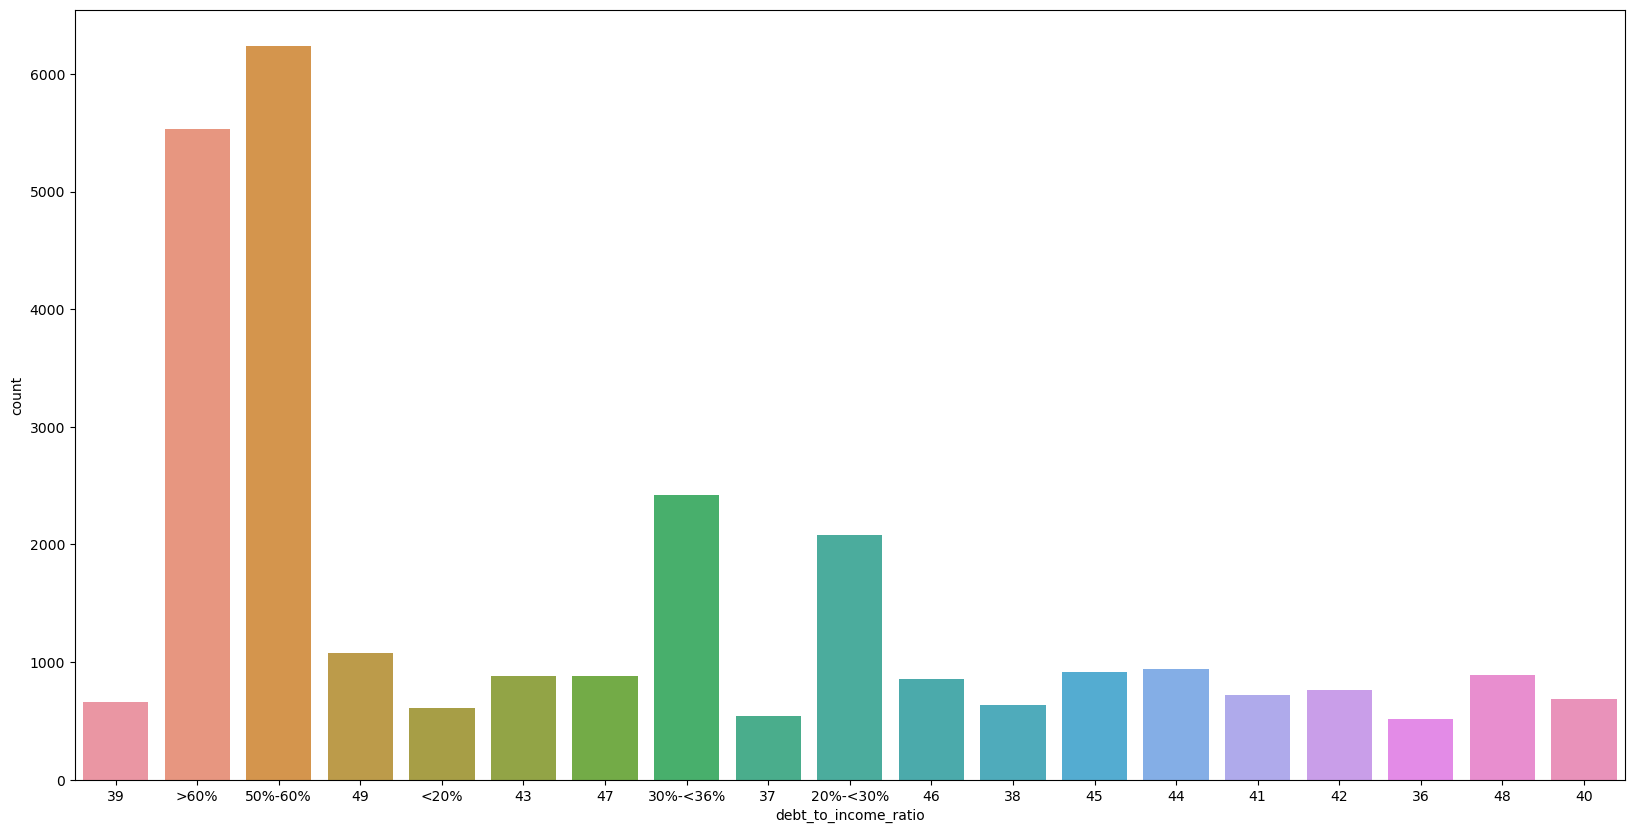

In [29]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
sns.countplot(x=denial_data['debt_to_income_ratio'])
plt.show() #DtoI of total denials

<AxesSubplot:xlabel='debt_to_income_ratio'>

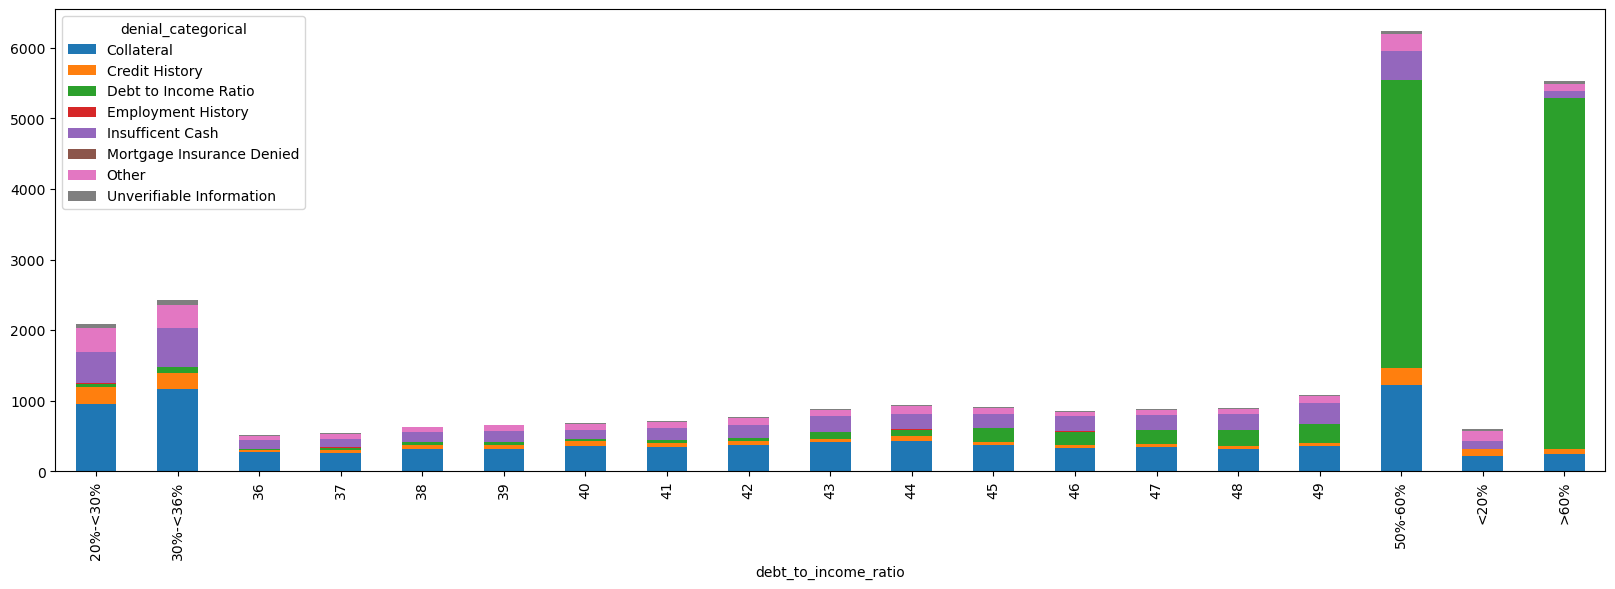

In [30]:
(denial_data.groupby('debt_to_income_ratio')
   ['denial_categorical'].value_counts()
   .unstack()
   .plot.bar(stacked=True,figsize=(20, 6))
) #DtoI of denial reasons

In [31]:
#we see that Debt to Income ratio has a large impact on approval status
data['combined_loan_to_value_ratio'] = data['combined_loan_to_value_ratio'].astype('float64')
import numpy as np
data['combined_loan_to_value_ratio'] = np.ceil(data['combined_loan_to_value_ratio']).astype(int) #change to int

In [32]:
data['income'] = data['income'].astype(int) #change to int

In [33]:
approval_data = data[data['denial_reason_1'] == 10] #splitting approvals

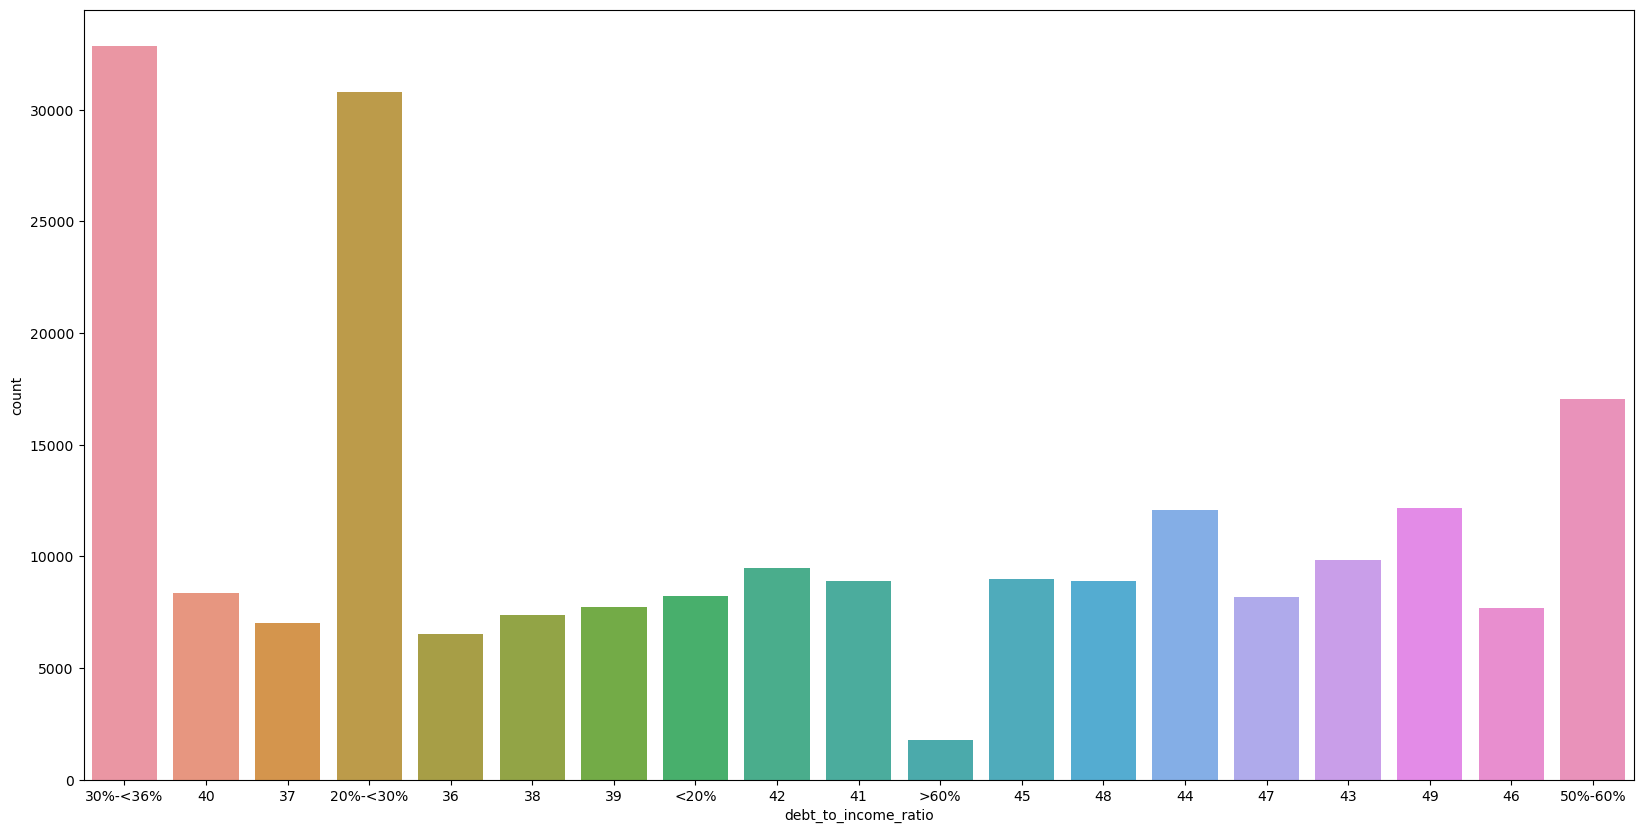

In [34]:
plt.figure(figsize=(20,10))
sns.countplot(x=approval_data['debt_to_income_ratio'])
plt.show() #DtoI of approvals

In [35]:
denial_data.shape #how many denials?

(27833, 27)

In [36]:
approval_data.shape #how many approvals?

(213856, 27)

In [37]:
#new column where 1 = favorable DtoI ratio and 0 = unfavorable DtoI ratio on the basis of favorable = <=43%
def map_debt_to_income(value):
    if value in ['30%-<36%', '40', '37', '20%-<30%', '36', '38', '39', '<20%', '42', '41', '43']:
        return 1
    elif value in ['>60%', '45', '48', '44', '47', '50%-60%', '49', '46']:
        return 0
    else:
        return None 

In [38]:
data['DI_indicator'] = data['debt_to_income_ratio'].apply(map_debt_to_income)

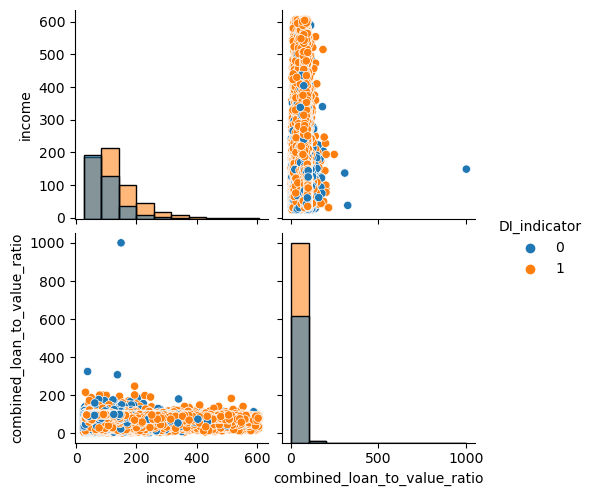

In [42]:
sns.pairplot(data, vars = ["income",'combined_loan_to_value_ratio'], hue = "DI_indicator", diag_kind = "hist", 
             diag_kws = {'alpha':0.55, 'bins':10})